# Imports (do NOT change/add)

In [1]:
from random import random, seed, gauss
from math import sqrt, cos, sin, log, pi
from numpy.random import multivariate_normal
from numpy.linalg import cholesky

import matplotlib.pyplot as plt
%matplotlib inline

# Constants (do NOT change/add)

In [2]:
rseed = 8675309
N = 10000

# initialize the RNG
seed(rseed)

# 1. Basic Stats
* Implement the mean and covariance functions

In [3]:
def mean(l):
    if len(l):
        mean1 = sum(l)/float(len(l))
    else:
        mean1 = 0
    return mean1
    
def mean_test(l, expected):
    print("mean({})={:.5f}, expected={:.5f}".format(str(l), mean(l), expected))
    
mean_test([], 0)
mean_test([1], 1)
mean_test([1, 2, 3], 2)
mean_test([1, 2, 3, 4], 2.5)
mean_test([0.607, 0.094, 0.314, 0.491, 0.664, 0.282, 0.914, 0.517, 0.731, 0.804], 0.5418)

mean([])=0.00000, expected=0.00000
mean([1])=1.00000, expected=1.00000
mean([1, 2, 3])=2.00000, expected=2.00000
mean([1, 2, 3, 4])=2.50000, expected=2.50000
mean([0.607, 0.094, 0.314, 0.491, 0.664, 0.282, 0.914, 0.517, 0.731, 0.804])=0.54180, expected=0.54180


In [4]:
def scovariance(l1, l2):
    variance = 0
    meanL1 = sum(l1)/float(len(l1))
    meanL2 = sum(l2)/float(len(l2))
    for list1, list2 in zip(l1, l2):
        variance += ((list1 - meanL1) * (list2 - meanL2))/ (len(l1) - 1)
    return variance

# input a list, output the sample variance
# equal to the self-covariance
def svariance(l):
    return scovariance(l,l)

##

def svariance_test(l, expected):
    print("svariance({})={:.5f}, expected={:.5f}".format(str(l), svariance(l), expected))
    
svariance_test([1, 2, 3], 1.)
svariance_test([1, 2, 3, 4], 5./3.)
svariance_test([600, 470, 170, 430, 300], 27130)

##

def scovariance_test(l1, l2, expected):
    print("scovariance({}, {})={:.5f}/{:.5f}, expected={:.5f}".format(str(l1), str(l2), scovariance(l1, l2), scovariance(l2, l1), expected))
    
scovariance_test([2.1, 2.5, 3.6, 4.0], [8, 10, 12, 14], 8./3.)

svariance([1, 2, 3])=1.00000, expected=1.00000
svariance([1, 2, 3, 4])=1.66667, expected=1.66667
svariance([600, 470, 170, 430, 300])=27130.00000, expected=27130.00000
scovariance([2.1, 2.5, 3.6, 4.0], [8, 10, 12, 14])=2.26667/2.26667, expected=2.66667


# 2. Generate Uniform Random Samples
* Generates three lists of N numbers, where each value is i.i.d. in [0,1]
* Respond to the question below

sample1 mean: 0.49878


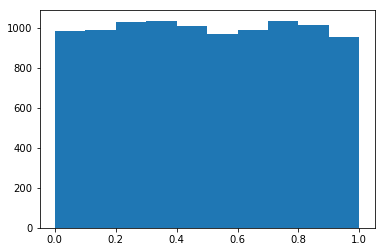

In [5]:
sample1 = [random() for i in range(N)]

plt.hist(sample1)
print("sample1 mean: {:.5f}".format(mean(sample1)))

sample2 mean: 0.50244


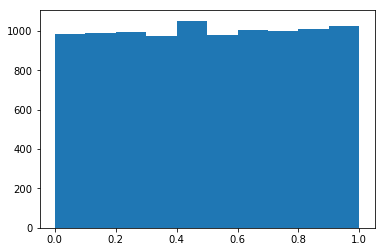

In [6]:
sample2 = [random() for i in range(N)]

plt.hist(sample2)
print("sample2 mean: {:.5f}".format(mean(sample2)))

sample3 mean: 0.50344


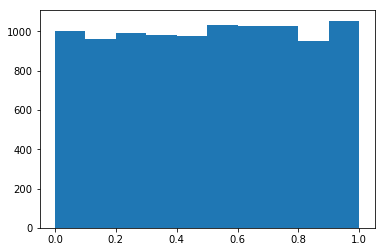

In [7]:
sample3 = [random() for i in range(N)]

plt.hist(sample3)
print("sample3 mean: {:.5f}".format(mean(sample3)))

## Q: Are these "good" samples? How do you know?
The above generated samples do not look good to me. The reason being, uniform random generation is a rectangular distribution, such that there is probability distribution that has constant probability through the samples. However here in above samples, the distribution isnt that uniform.

# 3. Inverse Transform Sampling
* Implement the CDF for a given PDF
* Implement the corresponding inverse-CDF

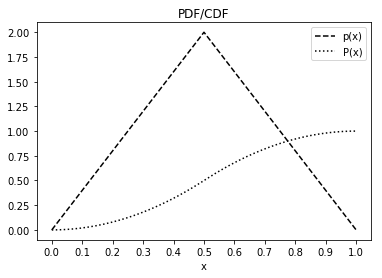

In [8]:
# input x, output p(x) for a function
def p(x): 
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return 4*x
    else:
        return -4*x + 4

# input x, output P(x) for p above
# p is PDF, this (P) should be CDF
def P(x): 
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return 2*x*x
    else:
        return -2*(x*x) + 4*x - 1

x = [x/1000. for x in range(0,1001,1)]

plt.plot(x, [p(n) for n in x], 'k--', label = 'p(x)')
plt.plot(x, [P(n) for n in x], 'k:', label = 'P(x)')

plt.xlabel('x')
plt.xticks([t/10. for t in range(0,11,1)])

plt.title('PDF/CDF')
plt.legend(loc=0)

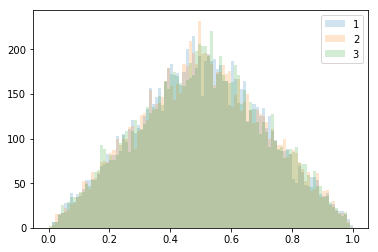

In [9]:
# input y, output x = P^(-1)(y)
# that is, the value of x for which P(x)=y
def invP(x):
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return (x/2)**0.5
    else:
        return (-4 + (-(8*x) + 8)**0.5)/-4
        
sampled1 = [invP(n) for n in sample1]
sampled2 = [invP(n) for n in sample2]
sampled3 = [invP(n) for n in sample3]

bins = [x/100. for x in range(0,101,1)]

plt.hist(sampled1, label='1', alpha=0.2, bins=bins)
plt.hist(sampled2, label='2', alpha=0.2, bins=bins)
plt.hist(sampled3, label='3', alpha=0.2, bins=bins)
plt.legend(loc='upper right')

# 4. Generate Normally Distributed Numbers via Box–Muller
* Implement the Box-Muller transform
* Implement function to shift/scale normally distributed values

In [10]:
def normalpair(x1, x2):
    a = sqrt(-2*log(x1))*cos(2*pi*x2)
    b = sqrt(-2*log(x1))*sin(2*pi*x2)
    return (a,b)

def scalenormal(x, mu, variance):
    val = mu + (sqrt(variance))*x
    return val

Gaussian 1: mean=0.98692, variance=25.08427
Gaussian 2: mean=29.99661, variance=3.98527


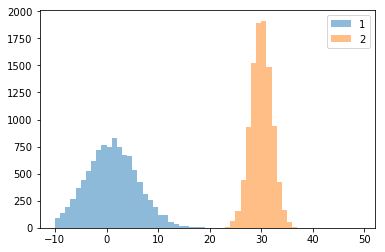

In [11]:
mymean1 = 1
myvariance1 = 25

mymean2 = 30
myvariance2 = 4

bins=range(-10, 50, 1)

mygaussians = [normalpair(x1, x2) for x1,x2 in zip(sample1, sample2)]
mygaussian1 = [scalenormal(x[0], mymean1, myvariance1) for x in mygaussians]
mygaussian2 = [scalenormal(x[1], mymean2, myvariance2) for x in mygaussians]

plt.hist(mygaussian1, label='1', alpha=0.5, bins=bins)
plt.hist(mygaussian2, label='2', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Gaussian 1: mean={:.5f}, variance={:.5f}".format(mean(mygaussian1), svariance(mygaussian1)))
print("Gaussian 2: mean={:.5f}, variance={:.5f}".format(mean(mygaussian2), svariance(mygaussian2)))

Python Gaussian1: mean=0.9626797664670734, variance=24.813998420670565


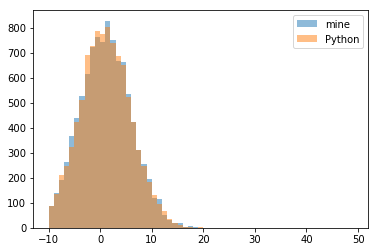

In [12]:
pythonG1 = [gauss(mymean1, sqrt(myvariance1)) for x in range(N)]

plt.hist(mygaussian1, label='mine', alpha=0.5, bins=bins)
plt.hist(pythonG1, label='Python', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Python Gaussian1: mean={}, variance={}".format(mean(pythonG1), svariance(pythonG1)))

Python Gaussian2: mean=29.981038509019378, variance=4.004938950448191


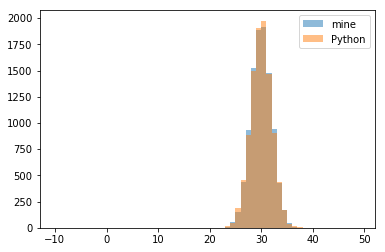

In [13]:
pythonG2 = [gauss(mymean2, sqrt(myvariance2)) for x in range(N)]

plt.hist(mygaussian2, label='mine', alpha=0.5, bins=bins)
plt.hist(pythonG2, label='Python', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Python Gaussian2: mean={}, variance={}".format(mean(pythonG2), svariance(pythonG2)))

# 5. Sampling a 1D Gaussian Mixture Model
* Implement the function to sample a 1D 2-Gaussian mixture model
* Respond to the question below

In [14]:

def samplemm(responsibility1, u, g1, g2):
    list1 = []       
    for i in range(len(u)):
        if u[i] > responsibility1:
            list1.append(g2[i])
        else:
            list1.append(g1[i])
    return list1

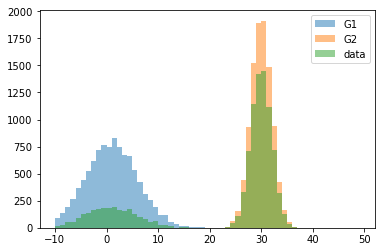

In [15]:
split = 0.25

plt.hist(mygaussian1, label='G1', alpha=0.5, bins=bins)
plt.hist(mygaussian2, label='G2', alpha=0.5, bins=bins)
plt.hist(samplemm(split, sample3, mygaussian1, mygaussian2), label='data', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

## Q: As you change the split variable, what happens to the resulting distribution? What are extreme values and what happens at these extremes?
As the split variable changes, the standard deviation of the entire distribution changes considerably.For extreme split values, standard deviation -> 0 that is why for the extreme split at 1, we observe the samples get picked only from Gaussian 2. For split 0, we observe the samples get picked only from Gaussian 1. For split 0.5, there is equal distribution of values from both G1 and G2.

# 6. Generate a 2D Gaussian Distribution
* Implement function to generate a 2D Gaussian given two sets of uniformly random values in [0,1]

In [16]:
twod_means = [10,20]
twod_cov = [[1000, -144], [-144, 36]]

Python Gaussian mean: (10.317153122556695, 19.925404360415023)
Python Gaussian cov: x=996.5590189130952, y=36.01298987165942 xy=-143.76439916406994


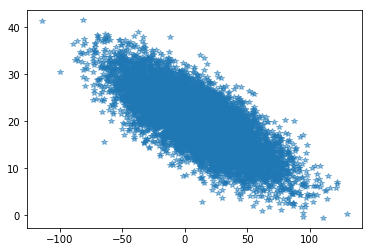

In [17]:
data = multivariate_normal(twod_means, twod_cov, N)
px = list(data[:,0])
py = list(data[:,1])

plt.plot(px, py, '*', alpha=0.5)

print("Python Gaussian mean: ({}, {})".format(mean(px), mean(py)))
print("Python Gaussian cov: x={}, y={} xy={}".format(scovariance(px,px), scovariance(py,py), scovariance(px,py)))

My Gaussian mean: (9.917252684970098, 20.005288321150953)
My Gaussian cov: x=1003.3707530613478, y=36.329206484528804 xy=-145.5809347397913


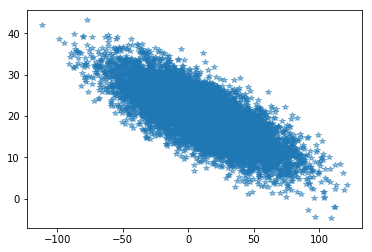

In [18]:
def g2d_sample(u1, u2, mu_x, mu_y, cov):
    L = cholesky(cov)
    
    tupleFormed = []
    listTuples = []
    
    for x, y in zip(u1, u2):
        xVal = mu_x + (L[0][0] * normalpair(x, y)[0] + L[0][1] * normalpair(x, y)[1])
        yVal = mu_y + (L[1][0] * normalpair(x, y)[0] + L[1][1] * normalpair(x, y)[1])
        tupleFormed = (xVal, yVal)
        listTuples.append(tupleFormed)
    
    return listTuples     

data = g2d_sample(sample1, sample2, twod_means[0], twod_means[1], twod_cov)
myx = [x[0] for x in data]
myy = [x[1] for x in data]

plt.plot(myx, myy, '*', alpha=0.5)

print("My Gaussian mean: ({}, {})".format(mean(myx), mean(myy)))
print("My Gaussian cov: x={}, y={} xy={}".format(scovariance(myx,myx), scovariance(myy,myy), scovariance(myx,myy)))

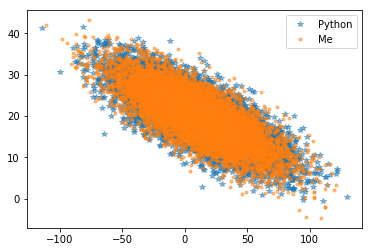

In [19]:
plt.plot(px, py, '*', alpha=0.5, label="Python")
plt.plot(myx, myy, '.', alpha=0.5, label="Me")
plt.legend(loc='upper right')

# Fin